思路  
1. 引入資料集  
2. 將資料分組 (實驗組 & 對照組)  
3. 做成決策樹 & 訓練模型
4. 繪出決策樹
5. 帶入對照組資料，預測
6. 正確率 (R2_score)
7. 剖析正確率 (混淆矩陣)

In [6]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

house = fetch_california_housing()
# 引入

df = pd.DataFrame(house["data"], columns=house["feature_names"])
df["target"] = house["target"]
# 資料 & 答案 df

x = pd.DataFrame(house["data"], columns=house["feature_names"])
y = house["target"]

In [7]:
from sklearn.model_selection import train_test_split
import numpy as np


xarray = np.array(x)
yarray = np.array(y)
# 轉array

x_train, x_test, y_train, y_test = train_test_split(xarray, yarray, test_size=0.1)

In [8]:
from sklearn.tree import DecisionTreeRegressor


reg = DecisionTreeRegressor(max_depth=5)
# 做成決策樹

reg.fit(x_train, y_train)
# 訓練模型

DecisionTreeRegressor(max_depth=5)

[Text(0.5, 0.9166666666666666, 'MedInc <= 5.029\nsquared_error = 1.329\nsamples = 18576\nvalue = 2.061'),
 Text(0.25, 0.75, 'MedInc <= 3.074\nsquared_error = 0.838\nsamples = 14669\nvalue = 1.731'),
 Text(0.125, 0.5833333333333334, 'AveRooms <= 4.314\nsquared_error = 0.561\nsamples = 7116\nvalue = 1.353'),
 Text(0.0625, 0.4166666666666667, 'MedInc <= 2.215\nsquared_error = 0.667\nsamples = 3021\nvalue = 1.609'),
 Text(0.03125, 0.25, 'AveRooms <= 3.296\nsquared_error = 0.561\nsamples = 1615\nvalue = 1.366'),
 Text(0.015625, 0.08333333333333333, 'squared_error = 0.871\nsamples = 459\nvalue = 1.832'),
 Text(0.046875, 0.08333333333333333, 'squared_error = 0.318\nsamples = 1156\nvalue = 1.181'),
 Text(0.09375, 0.25, 'AveOccup <= 2.162\nsquared_error = 0.643\nsamples = 1406\nvalue = 1.889'),
 Text(0.078125, 0.08333333333333333, 'squared_error = 1.09\nsamples = 313\nvalue = 2.463'),
 Text(0.109375, 0.08333333333333333, 'squared_error = 0.393\nsamples = 1093\nvalue = 1.724'),
 Text(0.1875, 0.4

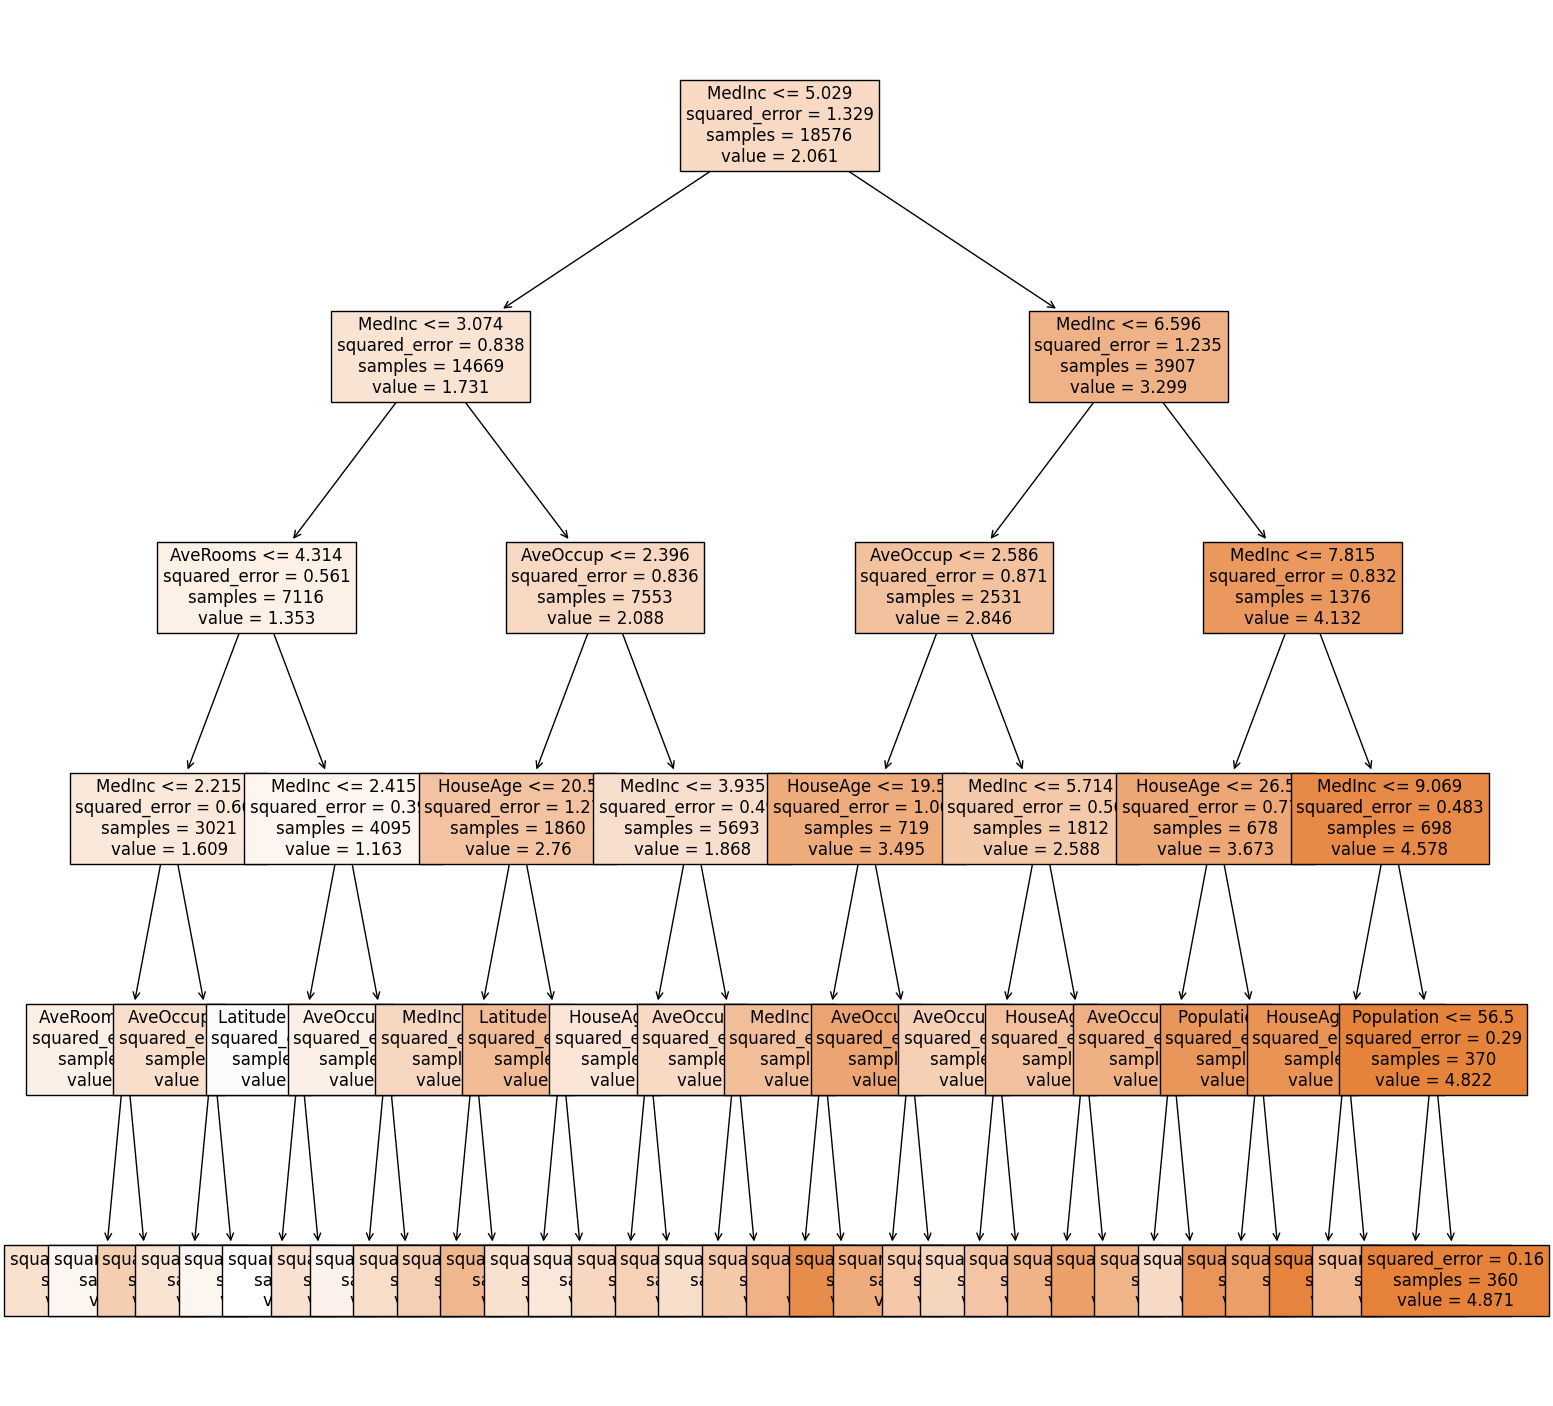

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(18,18))
plot_tree(reg, feature_names=house["feature_names"], filled=True, fontsize=12)

In [10]:
pre = reg.predict(x_test)

print("預測結果:", pre)
print("正確結果:", y_test)

預測結果: [1.18079152 2.32378027 0.86268025 ... 1.89021335 1.27167741 1.27167741]
正確結果: [0.958 2.667 0.75  ... 2.138 1.086 1.286]


In [12]:
from sklearn.metrics import r2_score


r2 = r2_score(y_test, pre)
print("正確率:", r2)

正確率: 0.6079691498200305
